<a href="https://colab.research.google.com/github/ashutosh100kumarsingh-blip/AML_LAB/blob/main/Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount the drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AML_LAB/data.csv")

In [ ]:
df.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN


#TEAM NAME NORMALIZATION

In [ ]:
# Standardize column names (safety step)
df.columns = df.columns.str.strip().str.lower()

# Team Name Normalization
df['team1'] = df['team1'].astype(str).str.lower().str.strip()
df['team2'] = df['team2'].astype(str).str.lower().str.strip()

# Verify unique team names after cleaning
unique_teams = pd.unique(df[['team1', 'team2']].values.ravel())

# Display results
print("Unique team names after cleaning:")
print(unique_teams)
print("\nTotal number of unique teams:", len(unique_teams))

# Preview cleaned data
display(df[['team1', 'team2']].head())


Unique team names after cleaning:
['kolkata knight riders' 'royal challengers bangalore'
 'chennai super kings' 'kings xi punjab' 'rajasthan royals'
 'delhi daredevils' 'mumbai indians' 'deccan chargers'
 'kochi tuskers kerala' 'pune warriors' 'sunrisers hyderabad'
 'rising pune supergiants' 'gujarat lions']

Total number of unique teams: 13


,team1,team2
0,kolkata knight riders,royal challengers bangalore
1,chennai super kings,kings xi punjab
2,rajasthan royals,delhi daredevils
3,mumbai indians,royal challengers bangalore
4,deccan chargers,kolkata knight riders


In [ ]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df.shape

(577, 18)

In [ ]:
print(df['team1'] , df['team1'])

0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object 0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object


In [ ]:
df['team1'] = df['team1'].astype(str).str.lower().str.strip()
df['team2'] = df['team2'].astype(str).str.lower().str.strip()
print(df['team1'] , df['team1'])
print(df['team2'] , df['team2'])

0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object 0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object
0      royal challengers bangalore
1                  kings xi punjab
2                 delhi daredevils
3      royal challengers bangalore
4            kolkata knight riders
                  ...             
572    royal challengers bangalore
573    royal challengers bangalore
57

In [ ]:
print(df['city'].isnull().sum()) #should've been 7 but i already did the code to fill missing with unknown

0


In [ ]:
df['city'] = df['city'].str.title()
print(df['city'].head)

<bound method NDFrame.head of 0       Bangalore
1      Chandigarh
2           Delhi
3          Mumbai
4         Kolkata
          ...    
572        Raipur
573     Bangalore
574         Delhi
575         Delhi
576     Bangalore
Name: city, Length: 577, dtype: object>


In [ ]:
df['city'].value_counts()

,count
city,
Mumbai,77
Bangalore,58
Kolkata,54
Delhi,53
Chennai,48
Chandigarh,42
Hyderabad,41
Jaipur,33
Pune,25


In [ ]:
# Standardize column names (safety)
df.columns = df.columns.str.strip().str.lower()

# City Name Standardization
df['city'] = df['city'].fillna('unknown')      # Step 1
df['city'] = df['city'].str.title()             # Step 2

# Count matches played in each city
city_match_count = df['city'].value_counts()

# Display results
print("Matches played in each city:\n")
print(city_match_count)

display(city_match_count.reset_index().rename(
    columns={'index': 'City', 'city': 'Matches Played'}
))


Matches played in each city:

city
Mumbai            77
Bangalore         58
Kolkata           54
Delhi             53
Chennai           48
Chandigarh        42
Hyderabad         41
Jaipur            33
Pune              25
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Dharamsala         9
Johannesburg       8
Unknown            7
Abu Dhabi          7
Cape Town          7
Port Elizabeth     7
Ranchi             7
Cuttack            7
Raipur             6
Sharjah            6
Rajkot             5
Kochi              5
Kimberley          3
East London        3
Nagpur             3
Bloemfontein       2
Indore             2
Kanpur             2
Name: count, dtype: int64


,Matches Played,count
0,Mumbai,77
1,Bangalore,58
2,Kolkata,54
3,Delhi,53
4,Chennai,48
5,Chandigarh,42
6,Hyderabad,41
7,Jaipur,33
8,Pune,25
9,Durban,15


#TOSS DECISION Text Analysis

In [ ]:
df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [ ]:
df['toss_decision'].value_counts()

,count
toss_decision,
field,315
bat,262


<Axes: xlabel='toss_decision'>

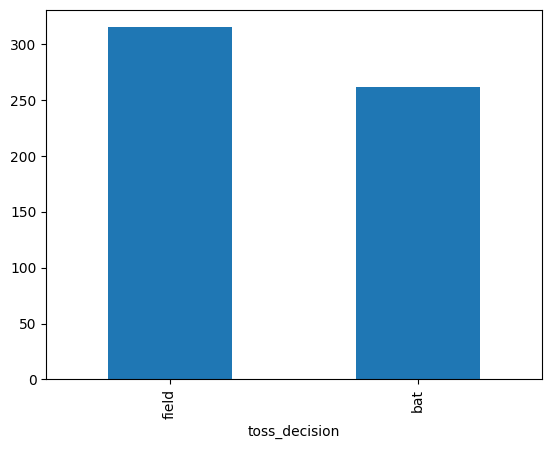

In [ ]:
bar = df['toss_decision'].value_counts()
bar.plot(kind='bar')

In [ ]:
df = df[df['result'] == "normal"]
df['result'].value_counts()

,count
result,
normal,568


In [ ]:
df['winner'].value_counts()

,count
winner,
Mumbai Indians,80
Chennai Super Kings,79
Royal Challengers Bangalore,69
Kolkata Knight Riders,68
Rajasthan Royals,61
Kings XI Punjab,61
Delhi Daredevils,56
Sunrisers Hyderabad,33
Deccan Chargers,29
